In [5]:
# Importing Libraries

import numpy as np 
import pandas as pd 

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt 

#Data processing 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score

#Algorithms
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import math

In [ ]:
# Columns Information

# 1) CRIM - per capita crime rate by town
# 2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
# 3) INDUS: proportion of non-retail business acres per town
# 4) CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# 5) NOX: nitric oxides concentration (parts per 10 million)
# 6) RM: average number of rooms per dwelling
# 7) AGE: proportion of owner-occupied units built prior to 1940
# 8) DIS: weighted distances to ﬁve Boston employment centers
# 9) RAD: index of accessibility to radial highways
# 10) TAX: full-value property-tax rate per 10,000 doller
# 11) PTRATIO: pupil-teacher ratio by town
# 12) B: (1000(Bk−0.63)2) where Bk is the proportion of blacks by
# 13) LSTAT: % lower status of the population
# 14) MEDV: Median value of owner-occupied homes in 1000 doller

In [6]:
# Importing datasets

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=columns)

# Printing dataset
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
# Data Analysis
#Checking for columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
# Getting number of rows and columns
df.shape

(506, 14)

In [9]:
# Checking the mean, minimum and other factors
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


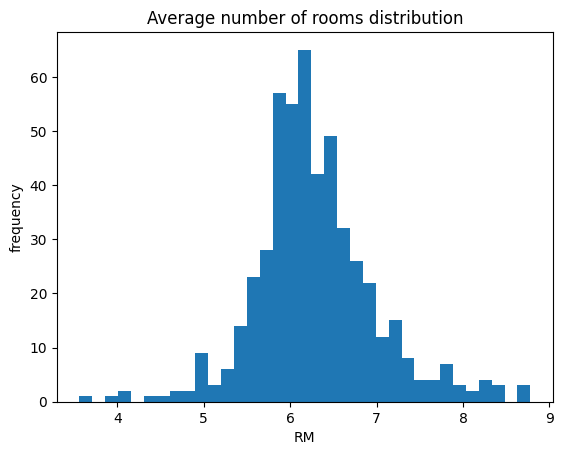

In [21]:
# Data Visualization

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(df['RM'], bins = 35)
plt.title("Average number of rooms distribution")
plt.xlabel("RM")
plt.ylabel("frequency")
plt.show()

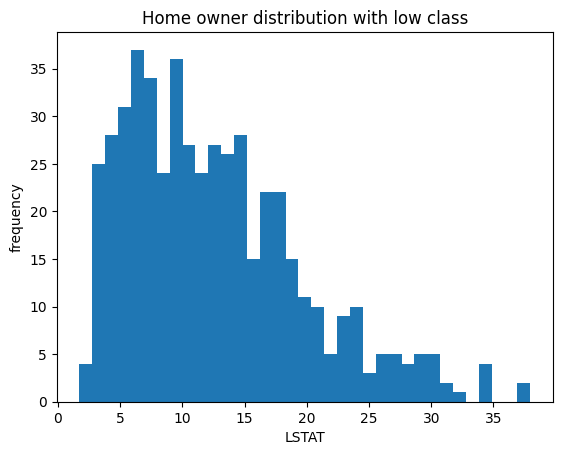

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(df['LSTAT'], bins = 35)
plt.title("Home owner distribution with low class")
plt.xlabel("LSTAT")
plt.ylabel("frequency")
plt.show()

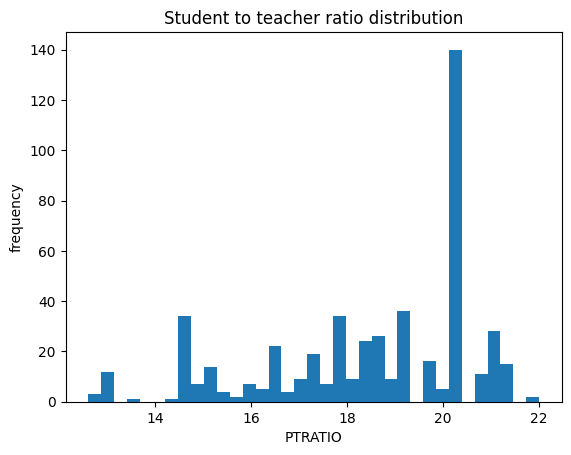

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(df['PTRATIO'], bins = 35)
plt.title("Student to teacher ratio distribution")
plt.xlabel("PTRATIO")
plt.ylabel("frequency")
plt.show()

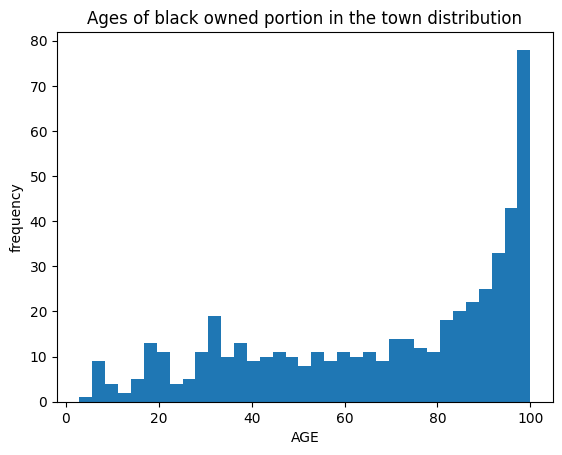

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(df['AGE'], bins = 35)
plt.title("Ages of black owned portion in the town distribution")
plt.xlabel("AGE")
plt.ylabel("frequency")
plt.show()

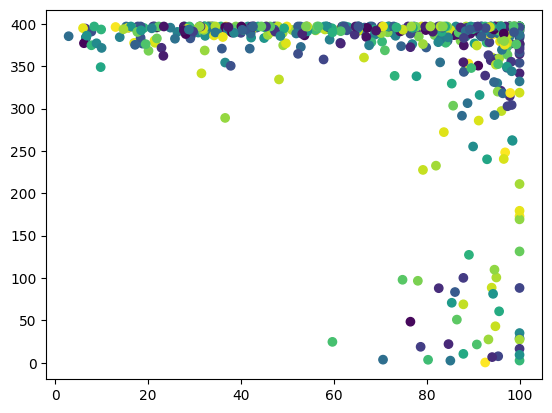

In [25]:
N = 506
x = df.AGE
y = df.B
colors = np.random.rand(N)

plt.scatter(x,y, c=colors)
plt.show()

<AxesSubplot: >

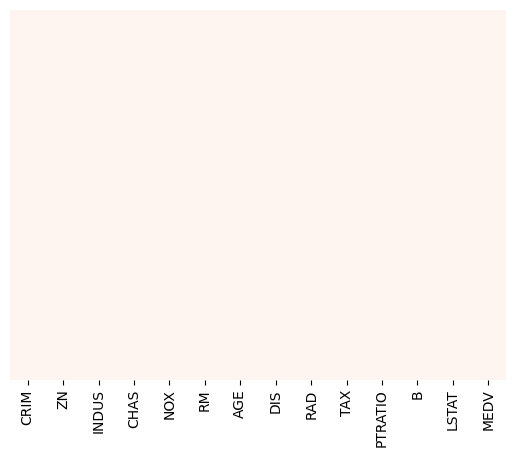

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Reds')

In [13]:
# Data Cleaning 

# df = df.fillna(df.mean())
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
df.rename(columns={'MEDV':'PRICE'}, inplace=True)

In [15]:
# Feature Engineering
corr = df.corr()
print(corr.shape)
print(df.shape)

(14, 14)
(506, 14)


In [17]:
    X = df.iloc[:,0:13] #independent columns
    y = df.iloc[:,-1] #target column i.e price range
    
    y = np.round(df['PRICE'])
    #Apply SelectKBest class to extract top 5 best features
    bestfeatures = SelectKBest(score_func=chi2)
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    # Concat two dataframes for better visualization
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['SPECS','SCORE'] #naming the dataframe columns
    featureScores

,SPECS,SCORE
0,CRIM,5503.817133
1,ZN,5937.859414
2,INDUS,873.746270
3,CHAS,59.080170
4,NOX,5.073299
5,RM,21.981504
6,AGE,2424.308937
7,DIS,163.919426
8,RAD,1445.257647
9,TAX,14817.836927


In [18]:
print(featureScores.nlargest(8,'SCORE')) #print 5 best features

    SPECS         SCORE
9     TAX  14817.836927
1      ZN   5937.859414
0    CRIM   5503.817133
11      B   3340.486412
6     AGE   2424.308937
8     RAD   1445.257647
12  LSTAT   1430.549632
2   INDUS    873.746270


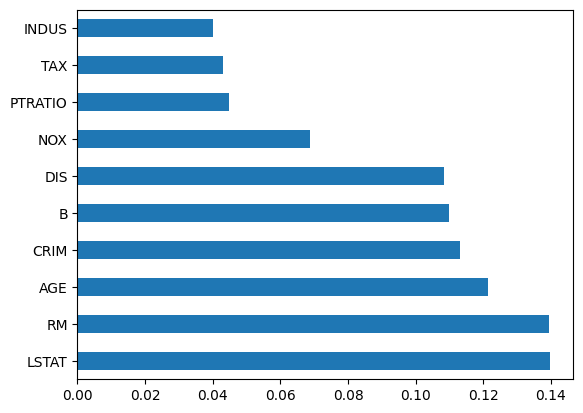

In [24]:
# Graph for feature importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [21]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [26]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.15)

# a benchmark regressor that takes mean of training sample as predicted value

class BenchmarkRegressor:
    def __init__(self):
        pass
    def fit(self, X, y, **kwargs):
        self.mean = y.mean
    def predict(self,X):
        return [self.mean]*len(X)
    def get_params(self, deep=False):
            return {}
bm_regr = BenchmarkRegressor()
lr_regr = LinearRegression()
dt_regr = DecisionTreeRegressor()
rf_regr = RandomForestRegressor()

In [28]:
 # create a list of models and evaluate each model 
models = [
        ('Benchmark', bm_regr),
        ('LR', lr_regr),
        ('Decision Tree', dt_regr),
        ('Random Forest', rf_regr)
]

In [29]:
print("Root Mean Square Error (RMSE) score\n")
scoring = 'neg_mean_squared_error'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    sqrt_cv_results = [math.sqrt(abs(i)) for i in cv_results]
    print("{}: {} ({})".format(name, np.mean(sqrt_cv_results), np.std(sqrt_cv_results)))
    print('Result from each iteration of cross validation:', cv_results, '\n')  


Root Mean Square Error (RMSE) score

Benchmark: nan (nan)
Result from each iteration of cross validation: [nan nan nan nan nan nan nan nan nan nan] 

LR: 4.971065631334419 (0.6805137454963269)
Result from each iteration of cross validation: [-35.44736727 -24.31999258 -16.0455826  -26.91410903 -26.18186446
 -20.14618714 -26.43960203 -13.77330168 -29.36385125 -33.11406665] 



c:\Users\praka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\praka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\praka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 107, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\Users\praka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\Users\praka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py", line 446, in mean_square

Decision Tree: 4.223265568482963 (0.8019337288754773)
Result from each iteration of cross validation: [-19.69767442  -9.39534884 -24.97674419 -33.02325581 -12.06976744
 -15.41860465 -19.41860465 -14.39534884 -24.8372093  -11.55813953] 

Random Forest: 3.330224308119771 (0.6177058168844156)
Result from each iteration of cross validation: [ -8.83783721  -7.30999535 -15.78260233 -22.82168605  -8.54978605
  -9.04380465 -12.54993721  -7.03613721 -11.89952791 -10.88823023] 



In [30]:
    print("R-squared Value\n")
    scoring = 'r2'
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        print("{}: {} ({})".format(name, cv_results.mean(), cv_results.std()))
        print('Result from each iteration of cross validation:', cv_results, '\n')   


R-squared Value

Benchmark: nan (nan)
Result from each iteration of cross validation: [nan nan nan nan nan nan nan nan nan nan] 

LR: 0.7095165275324578 (0.06620391142595786)
Result from each iteration of cross validation: [0.65860246 0.76128011 0.73971538 0.68314771 0.69895236 0.80368748
 0.6358035  0.81074837 0.59877504 0.70445286] 

Decision Tree: 0.7906232596544489 (0.08511904136545184)
Result from each iteration of cross validation: [0.81924868 0.93083294 0.6106822  0.68898114 0.83474497 0.84726219
 0.75205614 0.77312248 0.82427579 0.82502607] 



c:\Users\praka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\praka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\praka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 107, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "c:\Users\praka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "c:\Users\praka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py", line 927, in r2_score
  

Random Forest: 0.8668426204125564 (0.06779531601374515)
Result from each iteration of cross validation: [0.90696579 0.93100827 0.78339067 0.70714127 0.8945005  0.91107165
 0.84139983 0.90923548 0.8658836  0.91782915] 



In [48]:
model1 = lr_regr
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
rsquared_score = r2_score(y_test, y_pred)
print('RMSE score:', rmse_score)
print('R2 score:', rsquared_score)
print(y_test)
print(y_pred)

RMSE score: 4.3603740679712795
R2 score: 0.683056777688986
405     5.0
74     24.0
21     20.0
217    29.0
468    19.0
       ... 
247    20.0
121    20.0
446    15.0
27     15.0
100    28.0
Name: PRICE, Length: 76, dtype: float64
[ 8.66169719 25.65903702 17.44078378 28.94789214 17.3869749  23.6020904
 29.24661287 25.7056915  30.88248645 16.73499344 35.78562368 27.84214396
 25.87771675 15.85946873  0.12561424 22.39618153 27.21690334 21.37421727
 38.50092953 21.67528859  6.34849186 30.37636367 22.57660875 24.01815583
 18.73438935 23.69977141 31.72644376 30.45988265 22.55392441 24.06811949
 19.86991429  2.71505321 22.01887146 17.11332852 24.67346991 13.46930318
 22.02905288 20.83460751 40.18694713 29.28162137 20.04979066 33.79533709
 24.35492924 27.70794706  6.32404685 23.25082118 25.0086066  12.80434477
 19.35077547 27.42809876  7.24829172 17.01554538 21.01994604 19.89811113
 17.85133849  8.23780819 27.52513758 18.60735886 30.7607303  19.63590504
 35.82259084 31.29015491 24.6422736  13.

In [34]:
    print("Training Accuracy:",model1.score(X_train,y_train)*100)
    print("Testing Accuracy:",model1.score(X_test,y_test)*100)
    print("Model Accuracy:",r2_score(y,model1.predict(X))*100)

Training Accuracy: 74.25315803455949
Testing Accuracy: 68.3056777688986
Model Accuracy: 73.694883840205


In [36]:
    model2 = dt_regr
    model2.fit(X_train, y_train)
    y_pred = model2.predict(X_test)

    rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
    rsquared_score = r2_score(y_test, y_pred)
    print('RMSE score:', rmse_score)
    print('R2 score:', rsquared_score)

    # sns.regplot(y_test, y_pred);


RMSE score: 4.981544888253463
R2 score: 0.5863223393325099


In [38]:
print("Training Accuracy:",model2.score(X_train,y_train)*100)
print("Testing Accuracy:",model2.score(X_test,y_test)*100)
print("Model Accuracy:",r2_score(y,model2.predict(X))*100)

Training Accuracy: 100.0
Testing Accuracy: 58.63223393325099
Model Accuracy: 95.59657129863486


In [40]:
    model3 = rf_regr
    model3.fit(X_train, y_train)
    y_pred = model3.predict(X_test)

    rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
    rsquared_score = r2_score(y_test, y_pred)
    print('RMSE score:', rmse_score)
    print('R2 score:', rsquared_score)
   
    # sns.regplot(y_test, y_pred);


RMSE score: 2.844744924278893
R2 score: 0.865097302102213


In [41]:
print("Training Accuracy:",model3.score(X_train,y_train)*100)
print("Testing Accuracy:",model3.score(X_test,y_test)*100)
print("Model Accuracy:",r2_score(y,model3.predict(X))*100)

Training Accuracy: 98.23357229652669
Testing Accuracy: 86.5097302102213
Model Accuracy: 96.99075005887751
